In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("BU Athletics Data 22-23 - Sheet1.csv")
# Adjust the display options
pd.set_option('display.max_rows', 5)  #display max 5 rows
pd.set_option('display.max_columns', None)  #max cols none
pd.set_option('display.width', 1000)  #max width
df

,Data Input Year,Student,State,US Region,Country,English Language Primary Language of Country,IPEDS Race Description,Athletic Code 1,Team Gender,Athletic Code Description 1,HYR,Entering Term,Yr,FCLASS,RetentionClass,ACADINDEX,SATCFORAI,ACTUSE,SATCUSE,SATVUSE,satm,satwr,HSGPA,FIRSTCOLLEGE,FIRSTMAJOR,First Major (HEGIS) Description,LASTCOLLEGE,LASTMAJOR,Last Major (HEGIS) Description,Last Cumulative BU GPA,Cumulative GPA-1st Sem,Cumulative GPA-2nd Sem,Cumulative GPA-3rd Sem,Cumulative GPA-4th Sem,Cumulative GPA-5th Sem,Cumulative GPA-6th Sem,Cumulative GPA-7th Sem,Cumulative GPA-8th Sem,Cumulative GPA-9th Sem,Cumulative GPA-10th Sem,Cumulative GPA-11th Sem,Cumulative GPA-12th Sem,Cumulative GPA-13th Sem,Cumulative GPA-14th Sem,Cumulative GPA-15th Sem,Cumulative GPA-16th Sem,Cumulative GPA-17th Sem,Cumulative GPA-18th Sem,Cumulative GPA-19th Sem,Cumulative GPA-20th Sem,Cumulative GPA-21st Sem,Cumulative GPA-22nd Sem,Semester GPI-1st Sem,Semester GPI-2nd Sem,Semester GPI-3rd Sem,Semester GPI-4th Sem,Semester GPI-5th Sem,Semester GPI-6th Sem,Semester GPI-7th Sem,Semester GPI-8th Sem,Semester GPI-9th Sem,Semester GPI-10th Sem,Semester GPI-11th Sem,Semester GPI-12th Sem,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022,1,NaN,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,J20,Fall2020,U3,FRESHMEN,Freshmen,198.0,1220.0,NaN,NaN,NaN,NaN,NaN,3.4,CAS,2204.0,Economics,CAS,2204.0,Economics,3.00,3.57,3.57,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.57,0.00,2.85,0.00,2.90,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,2,CT,NaN,NaN,NaN,African American or Black,SC,M,MEN'S SOCCER,S17,Fall2017,U4,FRESHMEN,Freshmen,204.7,1230.0,NaN,1230.0,NaN,NaN,NaN,3.6,COM,602.0,Journalism,COM,601.0,Communication,3.46,2.90,3.04,3.14,3.19,3.29,3.34,3.41,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,3.46,2.90,3.18,3.35,3.33,3.68,3.6,3.85,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2023,992,NaN,NaN,China,Non-English,Non-Resident Alien,TW,W,WOMEN'S TENNIS,S22,Fall2022,U1,FRESHMEN,Freshmen,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,CAS,2204.0,Economics,CAS,2204.0,Economics,3.12,3.40,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.12,3.40,2.88,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,2023,993,CA,NaN,NaN,NaN,No Information,WS,W,WOMEN'S SOCCER,S22,Fall2022,U1,FRESHMEN,Freshmen,NaN,NaN,3.0,NaN,NaN,0.0,0.0,4.0,ENG,905.0,Biomedical Engnrng,ENG,910.0,Mechanical Engnrng,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


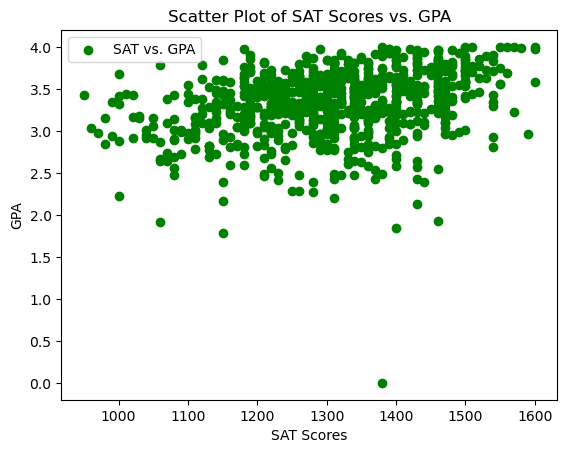

In [2]:
#draw scatter plot to show SAT Scores and GPA of all athletic students
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("BU Athletics Data 22-23 - Sheet1.csv")
sat_scores = df["SATCFORAI"]
gpa = df["Last Cumulative BU GPA"]

plt.scatter(sat_scores, gpa, marker='o', c='green', label='SAT vs. GPA')

plt.xlabel('SAT Scores')
plt.ylabel('GPA')
plt.title('Scatter Plot of SAT Scores vs. GPA')

plt.legend()

plt.show()

The scatter plots do not show obvious trend, so I will group students based on their sport's team. And I will compare their GPA with the SAT socre.

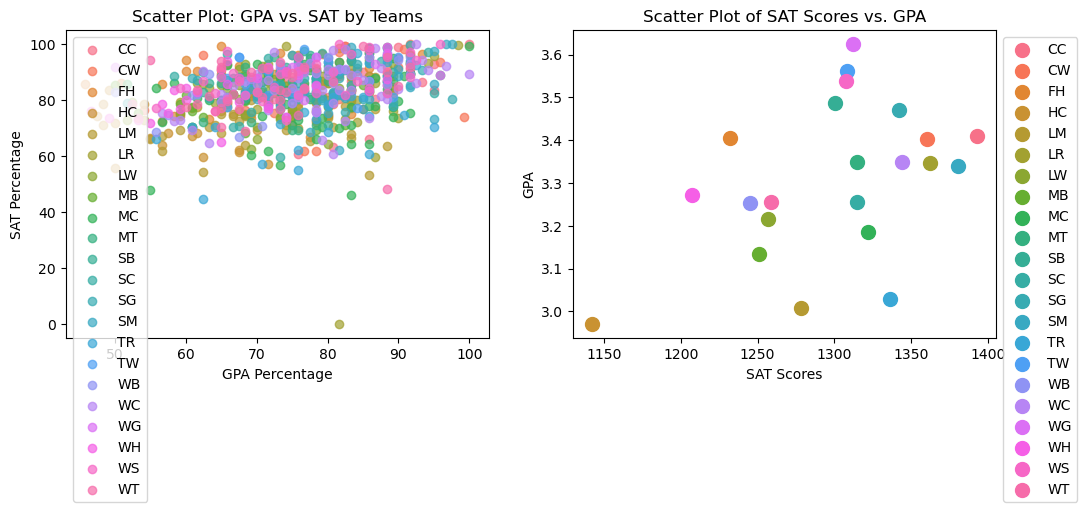

In [3]:
#transfer GPA and SAT to percentage and group the data by their athletic codes
#then compare them in scatter plots
#give every team different colors when drawing scatter plots
#STEP2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("BU Athletics Data 22-23 - Sheet1.csv")
#convert GPA to percentage (assuming 4.0 scale)
df['GPA_Percentage'] = (df['Last Cumulative BU GPA'] / 4.0) * 100
#convert SAT scores to percentage (assuming 1600 scale)
df['SAT_Percentage'] = (df['SATCFORAI'] - 400) / (1600 - 400) * 100

grouped_data = df.groupby("Athletic Code 1")
colors = sns.color_palette('husl', n_colors=len(grouped_data))

#create a grid of subplots to show two plots in parallel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#iterate through each group and plot the scatter points in a unique color
for i, (group_name, group_data) in enumerate(grouped_data):
    ax1.scatter(group_data['SAT_Percentage'], group_data['GPA_Percentage'], label=group_name, c=[colors[i]], alpha=0.7)

ax1.set_xlabel('GPA Percentage')
ax1.set_ylabel('SAT Percentage')
ax1.set_title('Scatter Plot: GPA vs. SAT by Teams')
ax1.legend()

#STEP3
#give each mean scatter plot unique color and legend
grouped_data2 = df.groupby("Athletic Code 1").agg({"SATCFORAI": "mean", "Last Cumulative BU GPA": "mean"}).reset_index()
avg_sat_scores = grouped_data2["SATCFORAI"]
avg_gpa = grouped_data2["Last Cumulative BU GPA"]

colors = sns.color_palette('husl', n_colors=len(grouped_data2))
for i, (team_name, avg_sat, avg_gpa) in enumerate(zip(grouped_data2["Athletic Code 1"], avg_sat_scores, avg_gpa)):
    ax2.scatter(avg_sat, avg_gpa, label=team_name, c=[colors[i]], s=100)  # 's' controls the marker size
    
#add labels and title
ax2.set_xlabel('SAT Scores')
ax2.set_ylabel('GPA')
ax2.set_title('Scatter Plot of SAT Scores vs. GPA')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

#show two plots in parallel
plt.show()

There might be some trends when comparing the average socres. 
    <br>- The team with the lowest score is HC: MEN'S ICE HOCKEY which is also the most famous sport team in Boston University. Based on the data of the average grades, both the GPA and the SAT score are the lowest when compared with other teams. 
    <br>- The team with the highest GPA is WR: WOMEN'S ROWING.
    <br>- The team with the highest SAT is CC: WOMEN'S SOCCER

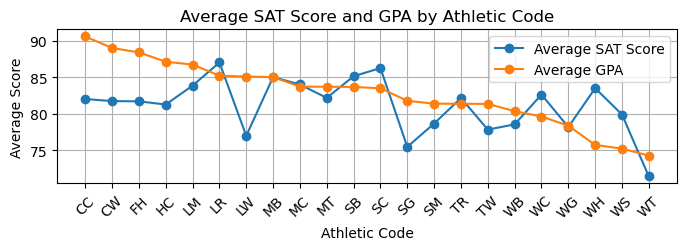

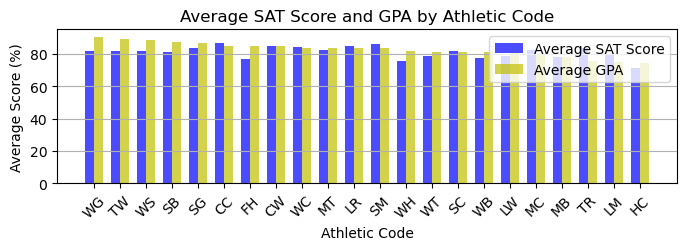

   Athletic Code 1    SATCFORAI  Last Cumulative BU GPA
18              WG  1312.500000                3.624545
15              TW  1308.000000                3.561667
..             ...          ...                     ...
4               LM  1278.524590                3.008989
3               HC  1142.413793                2.970465

[22 rows x 3 columns]


In [4]:
#average SAT score for each athletic group compare the SAT score wih GPA by plotting line chart and bar graph.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("BU Athletics Data 22-23 - Sheet1.csv")
#group the data by the "athletic_code" column and calculate the average SAT score and GPA
grouped_data = df.groupby("Athletic Code 1").agg({"SATCFORAI": "mean", "Last Cumulative BU GPA": "mean"}).reset_index()

#STEP 4 Line chart
# Extract the data for plotting
athletic_codes = grouped_data["Athletic Code 1"]
grouped_data = grouped_data.sort_values(by="Last Cumulative BU GPA", ascending=False)
avg_sat_scores = (grouped_data["SATCFORAI"]/1600)*100
avg_gpa = (grouped_data["Last Cumulative BU GPA"]/4)*100

#create a line chart
plt.figure(figsize=(8, 2))
plt.plot(athletic_codes, avg_sat_scores, marker='o', linestyle='-', label='Average SAT Score')
plt.plot(athletic_codes, avg_gpa, marker='o', linestyle='-', label='Average GPA')

plt.title('Average SAT Score and GPA by Athletic Code')
plt.xlabel('Athletic Code')
plt.ylabel('Average Score')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#STEP 5 Bar graph
#plot bar graphs to compare GPA and SAT and sorting bars based on GPA from Highest to Lowest
plt.figure(figsize=(8, 2))
#create an array for the x-axis with the team names
teams = grouped_data["Athletic Code 1"]

bar_width = 0.35
x = range(len(teams))

#plot the average SAT scores and the average GPA
plt.bar([pos - bar_width / 2 for pos in x], avg_sat_scores, bar_width, label='Average SAT Score', color='b', alpha=0.7)
plt.bar([pos + bar_width / 2 for pos in x], avg_gpa, bar_width, label='Average GPA', color='y', alpha=0.7)

plt.title('Average SAT Score and GPA by Athletic Code')
plt.xlabel('Athletic Code')
plt.ylabel('Average Score (%)')
plt.legend()

plt.grid(axis='y')
plt.xticks(x, teams, rotation=45)
plt.show()

# show the mean average GPA
print(f"{grouped_data}")

Based on the line chart, the average SAT socre does not seem to have correlation with the average GPA socre.
<br> Based on the bar graph, the correlation does not seem obvious neither.